# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alpine
Processing Record 2 of Set 1 | machico
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | inekar
City not found. Skipping...
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | tolanaro
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | badiyah
Processing Record 14 of Set 1 | savnik
City not found. Skipping...
Processing Record 15 of Set 1 | tadine
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | belmonte
Processing Record 19 of Set 1 | visaginas
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | port elizabeth
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alpine,32.8350,-116.7664,29.26,44,0,3.60,US,1725415353
1,machico,32.7000,-16.7667,22.35,69,40,7.72,PT,1725415356
2,wailua homesteads,22.0669,-159.3780,28.40,73,4,1.79,US,1725415358
3,longyearbyen,78.2186,15.6401,4.91,93,40,1.03,SJ,1725415362
4,luderitz,-26.6481,15.1594,15.45,64,73,4.51,NA,1725415366


In [11]:
# Path to the output directory and CSV file
output_dir = Path("output_data")
csv_path = output_dir / "cities.csv"

# Creates directory if it does not exist
output_dir.mkdir(parents=True, exist_ok=True)

# Export the City_Data into a CSV file
city_data_df.to_csv(csv_path, index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alpine,32.8350,-116.7664,29.26,44,0,3.60,US,1725415353
1,machico,32.7000,-16.7667,22.35,69,40,7.72,PT,1725415356
2,wailua homesteads,22.0669,-159.3780,28.40,73,4,1.79,US,1725415358
3,longyearbyen,78.2186,15.6401,4.91,93,40,1.03,SJ,1725415362
4,luderitz,-26.6481,15.1594,15.45,64,73,4.51,NaN,1725415366


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

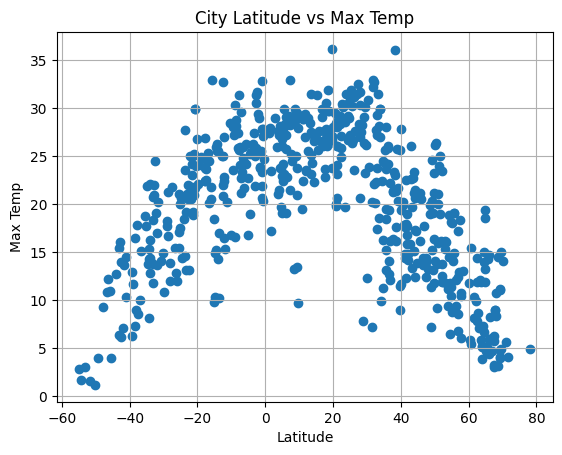

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

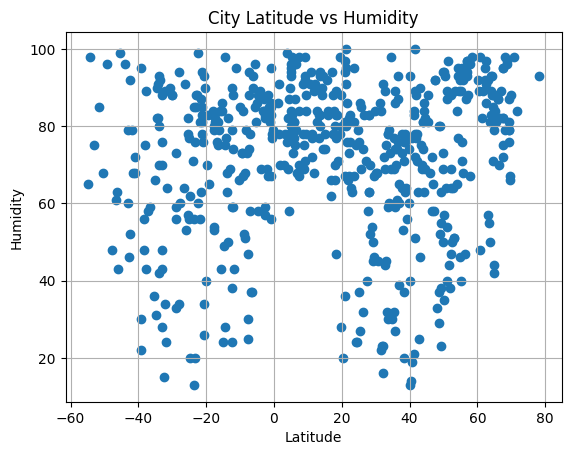

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

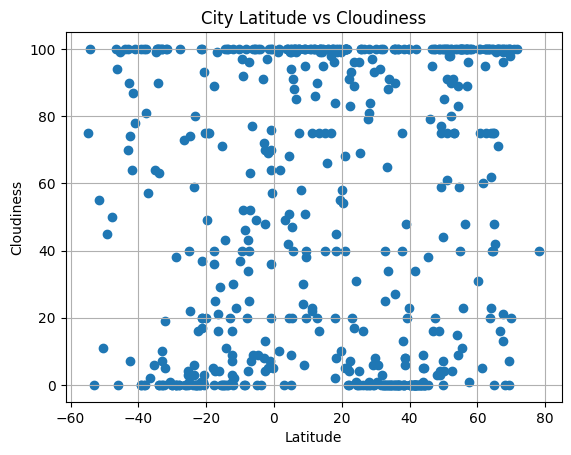

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

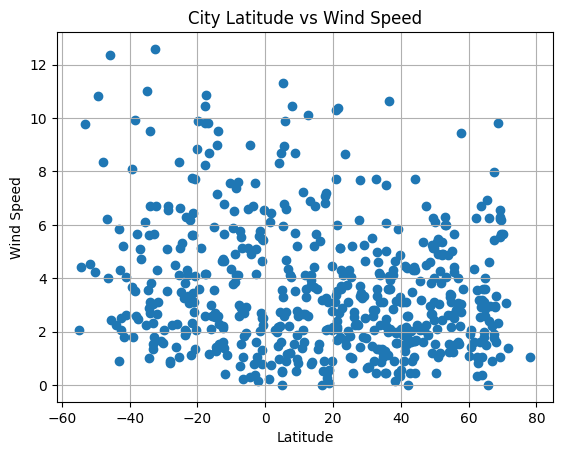

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [221]:

# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Calculate R-squared value
    r_squared = r_value**2
    
    # Print the R-squared value
    print(f"The r^2 value is: {r_squared}")
    plt.gcf().text(0.05, 0.95, f"The r^2 value is: {r_squared}", fontsize=10, color="black")
    
    # Plot scatter plot
    plt.scatter(x_values, y_values, linewidth=1, alpha=0.75)
    
    # Plot regression line and values
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color="red", verticalalignment='top')
    
    # Labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
        
    # Grid and Plot
    plt.grid(True)
    plt.show()

In [222]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alpine,32.8350,-116.7664,29.26,44,0,3.60,US,1725415353
1,machico,32.7000,-16.7667,22.35,69,40,7.72,PT,1725415356
2,wailua homesteads,22.0669,-159.3780,28.40,73,4,1.79,US,1725415358
3,longyearbyen,78.2186,15.6401,4.91,93,40,1.03,SJ,1725415362
6,thompson,55.7435,-97.8558,19.09,68,100,5.66,CA,1725415378


In [223]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,luderitz,-26.6481,15.1594,15.45,64,73,4.51,NaN,1725415366
5,blackmans bay,-43.0167,147.3167,15.41,60,100,0.89,AU,1725415370
7,tolanaro,-25.0319,46.9987,20.04,77,40,5.14,MG,1725415381
9,waitangi,-43.9535,-176.5597,12.68,96,100,2.24,NZ,1725415389
12,tadine,-21.5500,167.8833,22.99,63,100,5.60,NC,1725415398


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.5676513484342501


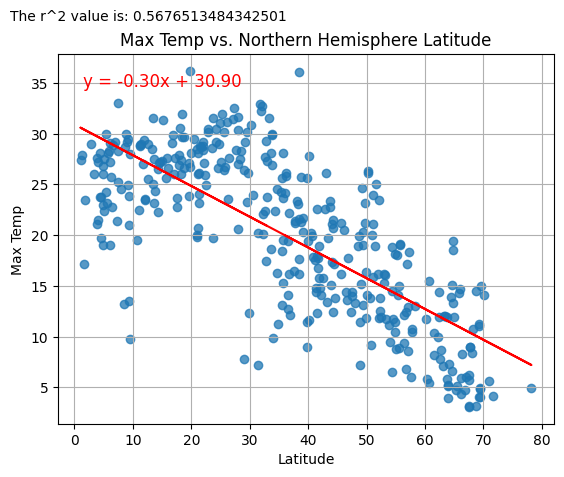

In [224]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Max Temp"
title = "Max Temp vs. Northern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)


The r^2 value is: 0.5877123391372701


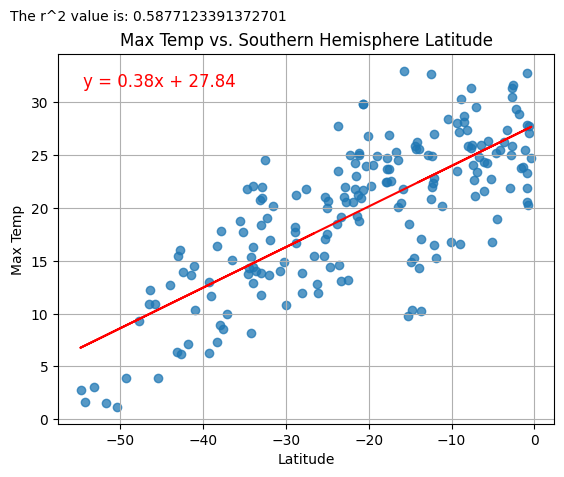

In [225]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Max Temp"
title = "Max Temp vs. Southern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.000308058163549056


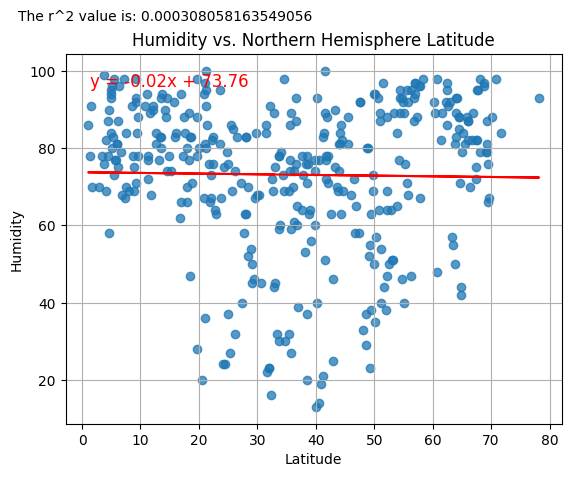

In [226]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Humidity"
title = "Humidity vs. Northern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)

The r^2 value is: 0.011831920039937209


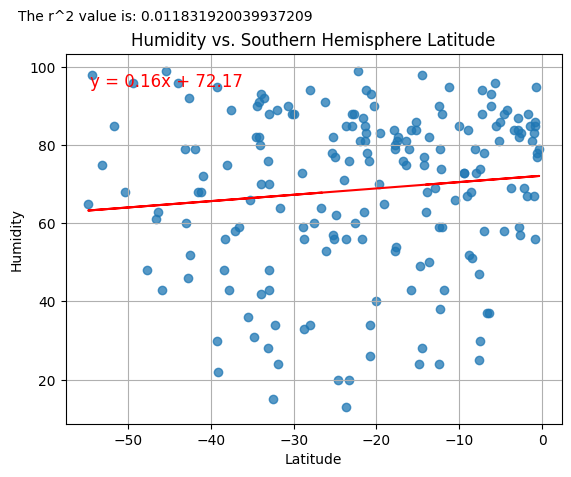

In [227]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Humidity"
title = "Humidity vs. Southern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.00012158509548309395


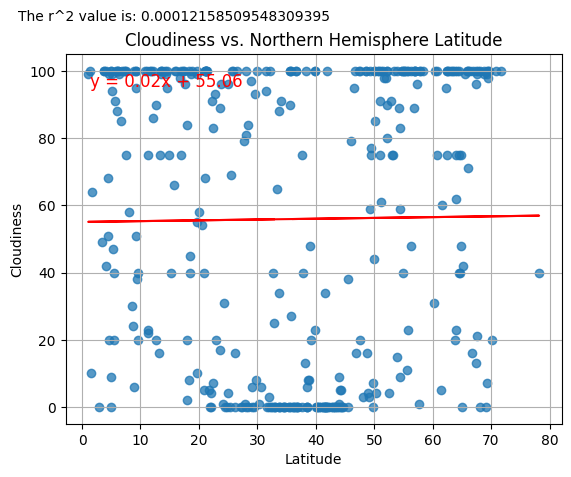

In [228]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Cloudiness"
title = "Cloudiness vs. Northern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)

The r^2 value is: 0.004653702608168661


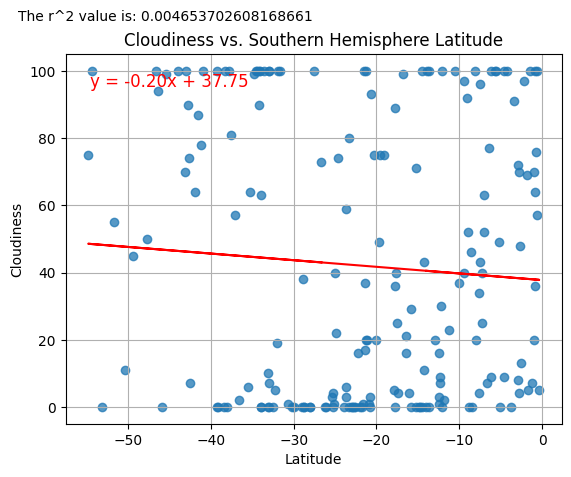

In [229]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Cloudiness"
title = "Cloudiness vs. Southern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.0015170249947975966


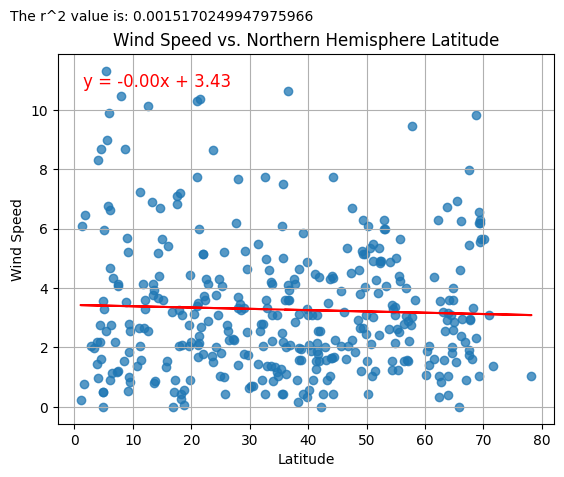

In [230]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Wind Speed"
title = "Wind Speed vs. Northern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)

The r^2 value is: 0.015715746846630328


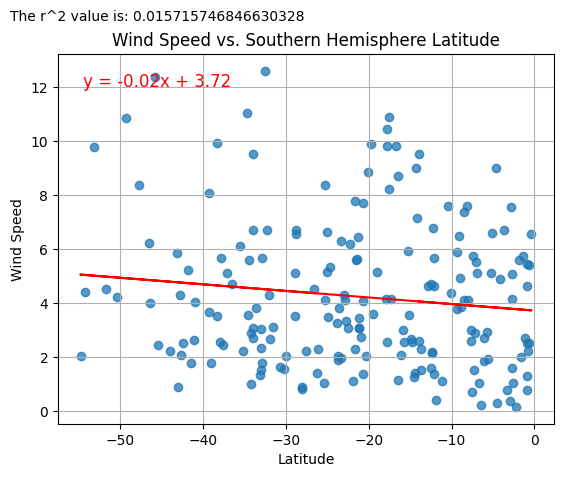

In [231]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Define labels and title for the plot
x_label = "Latitude"
y_label = "Wind Speed"
title = "Wind Speed vs. Southern Hemisphere Latitude"

# Call the linear regression plot function
linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE